## Install clip + autofaiss

In [1]:
!pip install clip-retrieval img2dataset autofaiss

     |████████████████████████████████| 1.4 MB 13.4 MB/s 
     |████████████████████████████████| 8.4 MB 16.3 MB/s 
     |████████████████████████████████| 87 kB 8.7 MB/s 
     |████████████████████████████████| 76 kB 5.7 MB/s 
     |████████████████████████████████| 64 kB 3.7 MB/s 
     |████████████████████████████████| 52 kB 1.7 MB/s 
  Created wheel for autofaiss: filename=autofaiss-1.3.0-py3-none-any.whl size=48780 sha256=78f88a5d535fc3273231ed722ef8bd4dcfa832d7ecba4c61aa7bf91ef8a7691e
  Stored in directory: /root/.cache/pip/wheels/a6/2f/e3/d2d4bda1af309cd9e86bd83652372762f5bae5460d4d5108cf
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115943 sha256=a9a2ecaa4a312b5c6e9f530d4dbeb41f1387779d5b4032232d018a554f5a9103
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41934 sha256=eb1f8693c149dda4dd1d24de8e1d363c2691206422a5ca97325fec6164

## Download dataset

In [1]:
!wget https://raw.githubusercontent.com/knok/pixabay-cat-images/master/classified-cat-jp-images.txt -O myimglist.txt

--2021-09-03 17:45:38--  https://raw.githubusercontent.com/knok/pixabay-cat-images/master/classified-cat-jp-images.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77377 (76K) [text/plain]
Saving to: ‘myimglist.txt’

myimglist.txt       100%[===================>]  75,56K  --.-KB/s    in 0,006s  

2021-09-03 17:45:38 (12,9 MB/s) - ‘myimglist.txt’ saved [77377/77377]



In [ ]:
# download pictures

In [2]:
!rm -rf image_folder

In [3]:
!img2dataset --url_list=myimglist.txt --output_folder=image_folder --thread_count=256 --image_size=256

100%|█████████████████████████████████████████████| 1/1 [00:07<00:00,  7.04s/it]


In [4]:
!ls image_folder/*

image_folder/00000.parquet

image_folder/00000:
0000.jpg   0161.json  0323.jpg	 0484.json  0646.jpg   0807.json  0969.jpg
0000.json  0162.jpg   0323.json  0485.jpg   0646.json  0808.jpg   0969.json
0001.jpg   0162.json  0324.jpg	 0485.json  0647.jpg   0808.json  0970.jpg
0001.json  0163.jpg   0324.json  0486.jpg   0647.json  0809.jpg   0970.json
0002.jpg   0163.json  0325.jpg	 0486.json  0648.jpg   0809.json  0971.jpg
0002.json  0164.jpg   0325.json  0487.jpg   0648.json  0810.jpg   0971.json
0003.jpg   0164.json  0326.jpg	 0487.json  0649.jpg   0810.json  0972.jpg
0003.json  0165.jpg   0326.json  0488.jpg   0649.json  0811.jpg   0972.json
0004.jpg   0165.json  0327.jpg	 0488.json  0650.jpg   0811.json  0973.jpg
0004.json  0166.jpg   0327.json  0489.jpg   0650.json  0812.jpg   0973.json
0005.jpg   0166.json  0328.jpg	 0489.json  0651.jpg   0812.json  0974.jpg
0005.json  0167.jpg   0328.json  0490.jpg   0651.json  0813.jpg   0974.json
0006.jpg   0167.json  0329.jpg	 0490.json  0652.jpg 

## Build clip image embeddings

In [5]:
!rm -rf embedding_folder

In [7]:
!clip-retrieval inference  --input_dataset image_folder --output_folder embedding_folder

1280it [00:01, 786.60it/s] 


In [8]:
!ls embedding_folder

img_emb  metadata


In [9]:
from pathlib import Path
import pandas as pd
data_dir = Path("embedding_folder/metadata")
df = pd.concat(
    pd.read_parquet(parquet_file)
    for parquet_file in data_dir.glob('*.parquet')
)
image_list = df["image_path"].tolist()

## Build the index

In [10]:
!rm -rf my_index_folder

In [12]:
# Build a KNN index
!autofaiss build_index --embeddings="embedding_folder/img_emb" \
                    --index_path="knn.index" \
                    --index_infos_path="infos.json" \
                    --metric_type="ip" \
                    --max_index_query_time_ms=5 \
                    --max_index_memory_usage="1GB"

Launching the whole pipeline 09/03/2021, 17:48:08
	Compute estimated construction time of the index 09/03/2021, 17:48:08
		-> Train: 16.7 minutes
		-> Add: 0.0 seconds
		Total: 16.7 minutes
	>>> Finished "Compute estimated construction time of the index" in 0.0000 secs
	Checking that your have enough memory available to create the index 09/03/2021, 17:48:08
	>>> Finished "Checking that your have enough memory available to create the index" in 0.0002 secs
	Selecting most promising index types given data characteristics 09/03/2021, 17:48:08
	>>> Finished "Selecting most promising index types given data characteristics" in 0.0021 secs
	Creating the index 09/03/2021, 17:48:08
		-> Instanciate the index HNSW15 09/03/2021, 17:48:08
		>>> Finished "-> Instanciate the index HNSW15" in 0.0022 secs
		-> Extract training vectors 09/03/2021, 17:48:08
100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 2360.33it/s]
		>>> Finished "-> Extract training vectors" in 0.0038 secs
		-> Tra

In [13]:
!ls my_index_folder

'HNSW15-efSearch=16383.index'


## Load the index

In [14]:
import faiss
import numpy as np
ind = faiss.read_index("knn.index")

## Simple image query from dataset

query :


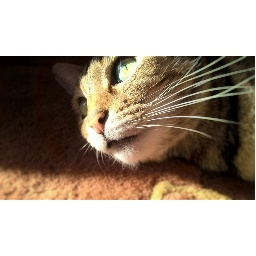

results :
similarity= 1.0002233
600


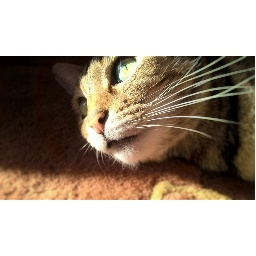

similarity= 0.938573
536


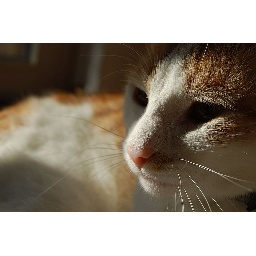

similarity= 0.9294769
569


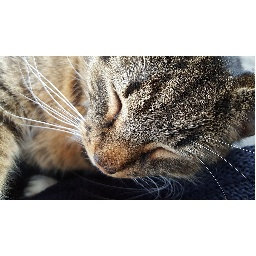

similarity= 0.9241176
289


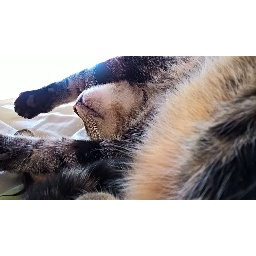

similarity= 0.9147578
220


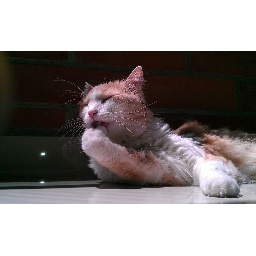

In [15]:
image_number = 600
from IPython.display import Image
print("query :")
display(Image(filename=image_list[image_number])) 

D, I = ind.search(np.expand_dims(ind.reconstruct(image_number), 0), 5)
print("results :")
for d, i in zip(D[0], I[0]):
  print("similarity=", d)
  print(i)
  display(Image(filename=image_list[i])) 

## Text to image query

In [16]:
import clip
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device, jit=False)

query :
a white cat with blue eyes
results :
similarity= 0.34918442
605


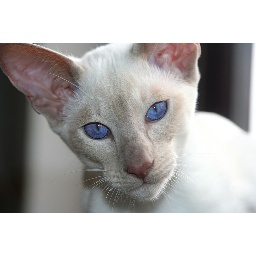

similarity= 0.33592817
192


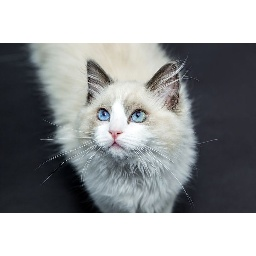

similarity= 0.33229536
58


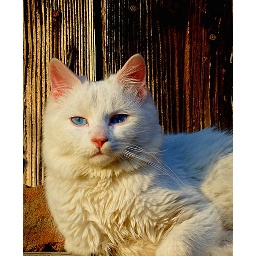

similarity= 0.3288885
911


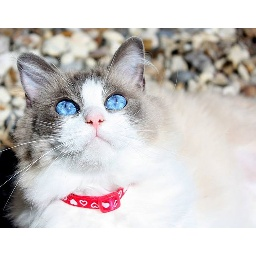

similarity= 0.32780161
795


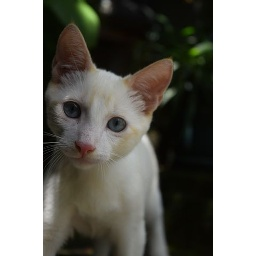

In [17]:
from IPython.display import Image

text = "a white cat with blue eyes"
text_tokens = clip.tokenize([text], truncate=True)

text_features = model.encode_text(text_tokens.to(device))
text_features /= text_features.norm(dim=-1, keepdim=True)
text_embeddings = text_features.cpu().detach().numpy().astype('float32')

print("query :")
print(text)

D, I = ind.search(text_embeddings, 5)
print("results :")
for d, i in zip(D[0], I[0]):
  print("similarity=", d)
  print(i)
  display(Image(filename=image_list[i])) 

## Image to image query

rm: cannot remove 'newcat.jpg': No such file or directory
--2021-09-03 17:48:40--  https://thiscatdoesnotexist.com/
Resolving thiscatdoesnotexist.com (thiscatdoesnotexist.com)... 95.216.76.20
Connecting to thiscatdoesnotexist.com (thiscatdoesnotexist.com)|95.216.76.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178655 (174K) [image/jpeg]
Saving to: ‘newcat.jpg’

newcat.jpg          100%[===================>] 174,47K  --.-KB/s    in 0,09s   

2021-09-03 17:48:40 (1,82 MB/s) - ‘newcat.jpg’ saved [178655/178655]

query :


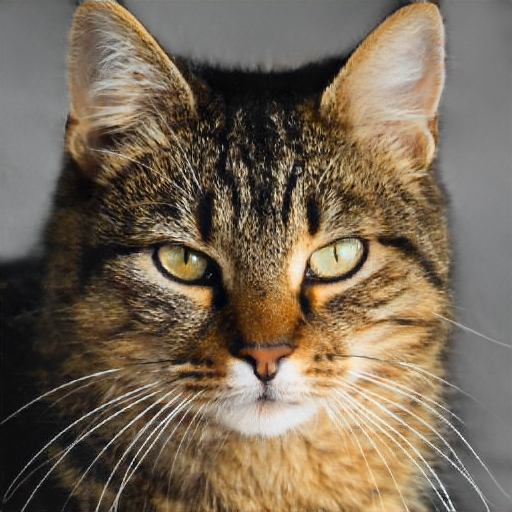

results :
similarity= 0.9238506
607


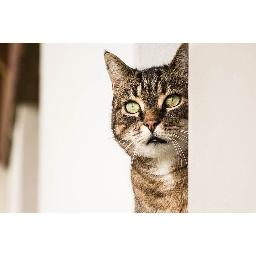

similarity= 0.9226495
474


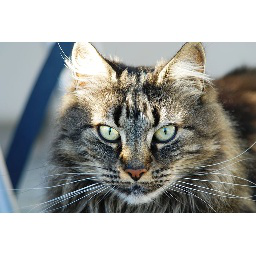

similarity= 0.9225365
98


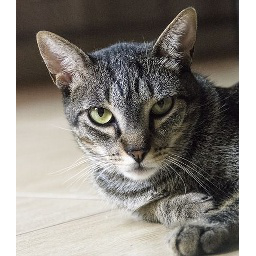

similarity= 0.91967094
775


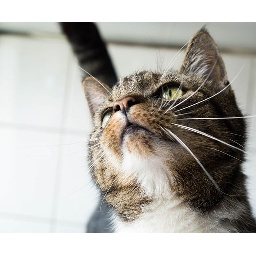

similarity= 0.9180758
794


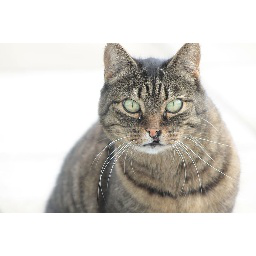

In [18]:
!rm newcat.jpg
!wget https://thiscatdoesnotexist.com/ -O newcat.jpg

from PIL import Image

image = Image.open("newcat.jpg")
image_tensor = preprocess(image)

image_features = model.encode_image(torch.unsqueeze(image_tensor.to(device), dim=0))
image_features /= image_features.norm(dim=-1, keepdim=True)

image_embeddings = image_features.cpu().detach().numpy().astype('float32')

print("query :")
display(image) 

D, I = ind.search(image_embeddings, 5)
print("results :")
for d, i in zip(D[0], I[0]):
  print("similarity=", d)
  print(i)
  display(Image.open(image_list[i])) 